# Aramark Final Project

<br>
<br>
<br>

##### Presentors

- Zheming An
- Andrew Chapkowski
- Shane Dasta
- Lingyu Guan


<p align="center">
  <img src="./img/aramark_logo.jpg">
</p>


- customer service business
- business streches accross food, facilities and uniforms
- ~270,000 employees
- servers over 19 countries around the world

# Presentation Outline

- Site Location

- Market Analysis

- Loss Prevention

- Tender Sales Analysis

<center><img src="./img/ds_kids.jpg"/> </center>

# Site Locations

<div align='right'>
<img src="./img/phillies.jpg" alt="philles" width="500" height="600">
</div>


- Drives sales
- Determines staffing

Understanding where you sell is critical for any organization.  Determining the potential market share that any one company may gain or lose by entering this market is key.  Sites, like stadiums, provide a unique situation where essentially customers are locked into spending their money at a small limited subset of locations.  

Even though is there is a limited market options for customers, a company must be aware of how many people attend an event.  
Regression Analysis can be used to , staffing and predicting attendance determines how the sales will be at each given

# Attendance Analysis

### Importance of Prediction

- Stadium staffing levels
- Local business impact
- Team owner profits

In [8]:
%matplotlib inline
import pandas as pd
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [9]:
att_df = pd.read_csv(r'data/DIM_ATTENDANCE.csv',
                            index_col=None,
                            infer_datetime_format=True)
cols = ['TotalAttendance', "ConcessionAttendance",
       'SuiteAttendance', 'ClubAttendance', 
       'MerchandiseAttendance']

## Site 1 Attendance Description

In [10]:
att_df.loc[att_df['Location'] == 'Site1', cols].describe()

,TotalAttendance,ConcessionAttendance,SuiteAttendance,ClubAttendance,MerchandiseAttendance
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,40196.933333,33779.866667,1986.200000,4430.866667,40196.933333
std,21518.376158,17793.743493,1009.693788,3020.068802,21518.376158
min,8272.000000,6108.000000,720.000000,0.000000,8272.000000
25%,17701.750000,14885.250000,925.000000,1310.750000,17701.750000
50%,45124.500000,37133.000000,2145.500000,5338.500000,45124.500000
75%,61538.000000,51083.250000,3074.750000,7376.000000,61538.000000
max,67002.000000,55536.000000,3339.000000,8142.000000,67002.000000


## Site 2 Attendance Description

In [11]:
att_df.loc[att_df['Location'] == 'Site2', cols].describe()

,TotalAttendance,ConcessionAttendance,SuiteAttendance,ClubAttendance,MerchandiseAttendance
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,19241.879518,16059.891566,846.650602,1423.650602,19241.879518
std,8071.583848,7501.156672,185.011498,607.358383,8071.583848
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14147.000000,10904.000000,798.500000,1131.000000,14147.000000
50%,18515.000000,15019.000000,866.000000,1333.000000,18515.000000
75%,25054.500000,21446.500000,940.500000,1661.000000,25054.500000
max,41586.000000,36872.000000,1129.000000,4945.000000,41586.000000


## Active Business Days Per Month

In [13]:
att_df.businessDate = pd.to_datetime(att_df.businessDate)

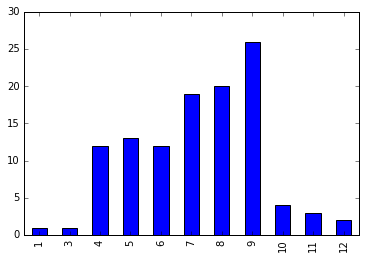

In [14]:
att_df.businessDate.dt.month.value_counts().sort_index().plot(kind='bar', 
                                                              colormap='winter')

# Predicting Attendance 

### Regression Model

- Estimates Relationships between 2 or more variables


$attendance = \beta_0 + \beta_1 * (x_1) + \beta_2 * (x_2) + \beta_3 * (x_3) + ... + \beta_n * (x_n)$

### Variables:

- Total Population (within 30 minute drive time)
- Age of Stadium
- Games Back from Wildcard
- Game Day Temperature
- Day of the Week
- Streak

In [15]:
import pandas as pd
import sklearn
import numpy as np
import scipy as sp
import datetime

age_of_staium = 2017 - 2004
total_population = 879000
weather = pd.read_csv(r"D:\ipython_working_folder\BigDataClass\project\data\site_data\weather.csv",
                      parse_dates=True,
                      )
ds = r"D:\ipython_working_folder\BigDataClass\project\data\site_data\PhilliesGames.csv"
df = pd.read_csv(ds)
df['TotalPop'] = total_population
df['AgeOfStadium'] = age_of_staium
df['Date'] = df['Date'] + ", 2017"
df['Date'] = [datetime.datetime.strptime(x.replace('(1),', ',').replace(' (2),', ',').replace(" , ", ", "), "%A %b %d, %Y") for x in df['Date'].tolist()]
df['JOIN_DATE'] = df.Date.dt.strftime('%Y-%m-%d')

q = weather['REPORTTPYE'] == 'SOD'
weather = weather.loc[q, ['DATE', 'DAILYAverageDryBulbTemp']].copy()
weather.reset_index(drop=True, inplace=True)
weather.DATE = pd.to_datetime(weather.DATE)
weather['JOIN_DATE'] = weather.DATE.dt.strftime('%Y-%m-%d')

merged = df.merge(weather, on="JOIN_DATE")
q_home = merged['Unnamed: 4'] != '@'
home_games_df = merged[q_home].copy()
home_games_df.reset_index(inplace=True, drop=True)
home_games_df = home_games_df[['JOIN_DATE', 'TotalPop',
                               'DAILYAverageDryBulbTemp', 'GB', 
                               'Streak', 'AgeOfStadium', ]]
plus_min = [1] * len(home_games_df)
for idx, row in enumerate(home_games_df.to_records(index=False,
                                                   convert_datetime64=True)):
    if row[-2].find('-') > -1:
        plus_min[idx] = -1 * len(row[-2])
    else:
        plus_min[idx] = len(row[-2])
home_games_df['Streak'] = plus_min
attend = pd.read_csv(r"D:\ipython_working_folder\BigDataClass\project\data\DIM_ATTENDANCE.csv",
                     parse_dates=True)
attend['JOIN_DATE'] = pd.to_datetime(attend['businessDate']).dt.strftime('%Y-%m-%d')
hg = home_games_df.merge(attend, on='JOIN_DATE')
q = hg.Location == 'Site2'
hg.GB = hg.GB * -1

hg['DayOfWeek']  = pd.to_datetime(hg['JOIN_DATE']).dt.dayofweek + 1
site2_df = hg[q]

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,10,11,14,15,20,23,25,39,40,44,45,59,63,64,67,68,69,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
site2_df.head(3)

,JOIN_DATE,TotalPop,DAILYAverageDryBulbTemp,GB,Streak,AgeOfStadium,EventID,Location,SiteID,POS_SystemID,businessDate,TotalAttendance,ConcessionAttendance,SuiteAttendance,TotalNumSuites,SuitesInUse,ClubAttendance,MerchandiseAttendance,DayOfWeek
0,2017-04-07,879000,46.0,-2.0,-3,13,14981354,Site2,6,93,4/7/2017,41586,36872,1091,70,66,2468,41586,5
1,2017-04-08,879000,50.0,-1.0,1,13,14995359,Site2,6,93,4/8/2017,33731,29966,876,70,49,1833,33731,6
2,2017-04-09,879000,53.0,-0.0,2,13,14999428,Site2,6,93,4/9/2017,33727,30281,745,68,48,1617,33727,7


In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

## Model Day of the Week

In [30]:
sunday_q = site2_df['DayOfWeek'] == 7
hg_sunday = site2_df[sunday_q].copy()

In [31]:
X = hg_sunday[['DAILYAverageDryBulbTemp', 'GB', 'Streak', 
               'DayOfWeek',  'AgeOfStadium']]
y = hg_sunday[ 'TotalAttendance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Attendance Regression Model

In [32]:
regr = LinearRegression()
regr.fit(X_train, y_train)
attend_y_pred = regr.predict(X_test)

In [33]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, attend_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, attend_y_pred))

Mean squared error: 25724617.90
Variance score: 0.14


# Market Analysis

## Loss Prevention

- Reduce "shrinkage"
- Detect deliberate human action that causes loss

## Categories of Loss

- Theft
- Fraud
- Waste and Abuse
- Misconduct


## Goal of Model

- Detect global trend of malicious activity
- Outliers using standard deviation
- Follow up with managers to find out why excessive activity occur

In [34]:
df = pd.read_csv('./data/FACT_Sites_2017.csv',
                 na_values='NULL',
                 parse_dates=True, 
                 usecols=['Site', 'Location', 'businessDate', 
                          'transDatetime','recordID', 
                          'checkEmployeeID',  'managerEmployeeID', 
                          'voidFlag', 'reasonCode', 'priceOvrdeFlag'])
df.voidFlag = df.voidFlag.astype(bool)
df.priceOvrdeFlag = df.priceOvrdeFlag.astype(bool)
df.loc[df.managerEmployeeID.notnull(), 'managerEmployeeID'] = \
df.loc[df.managerEmployeeID.notnull(), 'managerEmployeeID'].astype(int).astype(str)

##  Convert Data into Workable Format

- Pivot the table to summarize by day and manager

In [35]:
q = ((df.priceOvrdeFlag == True) | (df.voidFlag == True)) & (df.managerEmployeeID.notnull())
pivot_df = df[q].pivot_table(index='managerEmployeeID', 
                             columns='businessDate', 
                             values=['priceOvrdeFlag'], #, 'voidFlag'
                             aggfunc='count')

In [36]:
pivot_df.head()

priceOvrdeFlag                                    \
businessDate      2016-08-06 00:00 2016-08-09 00:00 2016-08-11 00:00   
managerEmployeeID                                                      
18177424                       NaN              NaN              NaN   
18236719                       NaN              NaN              8.0   
18236720                       NaN              NaN              1.0   
18236794                       NaN              NaN              4.0   
18236802                       4.0              NaN              NaN   

                                                                      \
businessDate      2016-09-01 00:00 2016-09-02 00:00 2016-09-10 00:00   
managerEmployeeID                                                      
18177424                       NaN              NaN              NaN   
18236719                       NaN              NaN              NaN   
18236720                       NaN              NaN              NaN   
18236794                       NaN              1.0              NaN   
18236802                       NaN             11.0              NaN   

                                                                      \
businessDate      2016-09-11 00:00 2016-09-12 00:00 2016-09-24 00:00   
managerEmployeeID                                                      
18177424                       NaN              NaN              NaN   
18236719                       NaN              NaN              NaN   
18236720                       NaN              NaN              NaN   
18236794                       2.0              NaN              NaN   
18236802                      11.0              NaN              NaN   

                                         ...                          \
businessDate      2016-09-25 00:00       ...        2017-09-18 00:00   
managerEmployeeID                        ...                           
18177424                       NaN       ...                     NaN   
18236719                       NaN       ...                     NaN   
18236720                       NaN       ...                     NaN   
18236794                       1.0       ...                     NaN   
18236802                       NaN       ...                     NaN   

                                                                      \
businessDate      2017-09-19 00:00 2017-09-20 00:00 2017-09-21 00:00   
managerEmployeeID                                                      
18177424                       NaN              NaN              NaN   
18236719                       NaN              NaN              NaN   
18236720                       NaN              NaN              NaN   
18236794                       NaN              NaN              NaN   
18236802                       NaN              NaN              NaN   

                                                                      \
businessDate      2017-09-23 00:00 2017-09-25 00:00 2017-09-26 00:00   
managerEmployeeID                                                      
18177424                       NaN              NaN              NaN   
18236719                       NaN              NaN              NaN   
18236720                       NaN              NaN              NaN   
18236794                       NaN              NaN              NaN   
18236802                       NaN              NaN              NaN   

                                                                      
businessDate      2017-09-27 00:00 2017-09-29 00:00 2017-09-30 00:00  
managerEmployeeID                                                     
18177424                       NaN              NaN              NaN  
18236719                       NaN              NaN              NaN  
18236720                       NaN              NaN              NaN  
18236794                       NaN              NaN              NaN  
18236802                       NaN              NaN          

## Calculate the Top 5 Managers

- Show managers who perform high number of voids

In [37]:
top20 = pivot_df.sum(axis=1).nlargest(5)
sns.set_style("whitegrid")
top20.name = "VOIDS"
top20_df = top20.to_frame()
top20_df['AVERAGE'] = pivot_df.sum(axis=1).mean()
top20_df.sort_values("VOIDS", inplace=True, ascending=False)
top20_df.reset_index(inplace=True, drop=False)

g = sns.barplot(x="managerEmployeeID", y="VOIDS",               
                data=top20_df.astype(int))
plt.tight_layout()
plt.xticks(rotation=45)

NameError: name 'sns' is not defined

## Calculating Suspiciousness as a Metric


<b/>

<img src='./img/thief.jpg' />



- Find the Daily Mean
    - If greater than mean then mark the day
    - Then pull managers who show potential large number of voids

## Calculating Suspiciousness as a Metric (cont)

**1).** Calculate for each day questionable activity

In [ ]:
keeps_cols = []
mean = pivot_df.mean().mean()
for col in pivot_df.columns:
    q = pivot_df[col] >= mean
    s = pivot_df.loc[q, col]
    if len(s) > 0:
        keeps_cols.append(col)

**2).** Flag Managers Outside the Norm for each day worked

In [ ]:
tracker = {}
for col in keeps_cols:
    q = pivot_df[col] >= pivot_df[keeps_cols].describe().iloc[6][col]
    for manager_id in pivot_df[q].index.tolist():
        if manager_id in tracker:
            tracker[manager_id] += 1
        else:
            tracker[manager_id] = 1

**3).** Find the Biggest Offenders

In [ ]:
df_final = pd.DataFrame(list(zip(tracker.keys(), tracker.values())), columns=["MANAGERID", "COUNTS"])
df_final.MANAGERID = df_final.MANAGERID.astype(int).astype(str)
df_final.describe()
sns.distplot(df_final['COUNTS'])

In [ ]:
df = randVendorFreqs(locFreqDict, 2)
df_new = pd.DataFrame(df['itemsGroup'].tolist(), 
                      columns=['Item1', 'Item2', 'Item3'])
q = df['Item1'] == 'DogFishHead LPD'
df_new[q]

In [ ]:
q = np.abs(df_final.COUNTS - df_final.COUNTS.mean()) > (3 * df_final.COUNTS.std())

# Questions?